# **Author: Sébastien Doyez**

Please check the work of this [
paper](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbThOOFUzWXJabFh3S2xpV1M3b3RYVGtzeW1QUXxBQ3Jtc0ttVVZQRTZFV3hxWkJwMmxqb1hSMVFrRTc0MXpiWTJHRHJzMmQzX2xOVmcxYjcxbHl4ck45TENNX0h3SFpfbXJuQmdjRVB6U2QwdTl4MGlvWDduOExaSmRxRWVIOTRVSmhXWjNnUTl3eFJadml4RUt2WQ&q=https%3A%2F%2Fwww.cs.cmu.edu%2F%7Ersalakhu%2Fpapers%2Foneshot1.pdf&v=LKispFFQ5GU ).


I also used the tutorial of [Nicholas Renotte](https://www.youtube.com/watch?v=LKispFFQ5GU&t=1448s).



# Setup:

1.1 Install Dependencies:

In [1]:
!pip install 'protobuf<=3.20.1' --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-aiplatform 1.71.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery-connection 1.16.1 requir

In [2]:
!pip install tensorflow tensorflow-gpu==2.8.1 opencv-python matplotlib protobuf==3.20.*

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 36.6 MB

1.2 Import Dependencies

In [3]:
# stndard libs:
import os
import cv2
import imghdr
import random
import numpy as np
from matplotlib import pyplot as plt


In [4]:
#AI dependancies:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf

1.3 Set GPU Growth:

limit what Tensorflow can use in the memory:

In [5]:
# Avoid GPU errors by settings GPU Memory Consuption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1.4 Create folder Structures:

We will have 3 types of images:
* anchor: it's the verificatio image
* positive image
* negative image

the AI will tell us if the anchor match to the positive image.

In [6]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [7]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# **2) Collect the data:**

2.1) Un tar labelled Faces in the Dataset:

In [8]:
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvzf lfw.tgz
!rm lfw.tgz
!ls lfw

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
lfw/John_Brady/John_Brady_0002.jpg
lfw/Greg_Kinsey/
lfw/Greg_Kinsey/Greg_Kinsey_0001.jpg
lfw/Victor_Kraatz/
lfw/Victor_Kraatz/Victor_Kraatz_0001.jpg
lfw/Shae-Lynn_Bourne/
lfw/Shae-Lynn_Bourne/Shae-Lynn_Bourne_0001.jpg
lfw/Amanda_Bynes/
lfw/Amanda_Bynes/Amanda_Bynes_0001.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0002.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0003.jpg
lfw/Amanda_Bynes/Amanda_Bynes_0004.jpg
lfw/Julie_Infante/
lfw/Julie_Infante/Julie_Infante_0001.jpg
lfw/Jim_Calhoun/
lfw/Jim_Calhoun/Jim_Calhoun_0001.jpg
lfw/Cliff_Ellis/
lfw/Cliff_Ellis/Cliff_Ellis_0001.jpg
lfw/Sean_Hayes/
lfw/Sean_Hayes/Sean_Hayes_0001.jpg
lfw/Sean_Hayes/Sean_Hayes_0002.jpg
lfw/Avril_Lavigne/
lfw/Avril_Lavigne/Avril_Lavigne_0001.jpg
lfw/Eric_Benet/
lfw/Eric_Benet/Eric_Benet_0001.jpg
lfw/Ali_Fallahian/
lfw/Ali_Fallahian/Ali_Fallahian_0001.jpg
lfw/Shanna_Zolman/
lfw/Shanna_Zolman/Shanna_Zolman_0001.jpg
lfw/Aiysha_Smith/
lfw/Aiysha_Smith/Aiysha_Smi

In [9]:
# Move the LFW data in the data/negative folder:
for directory in os.listdir('lfw'):
  # In all the directories (one by one)
    for file in os.listdir(os.path.join('lfw', directory)):
        # for all the file in the sub directoriy:
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)

        # Change the path
        os.replace(EX_PATH, NEW_PATH)

2.2) Collect positive images:

In [10]:
# Run on your computer, this doesn t work on colab!

import uuid

cap = cv2.VideoCapture(4)
while cap.isOpened():
  ret, frame = cap.read()
  frame = cv2.resize(frame, (250, 250))
  # Show the image:
  cv2.imshow("Image taken", frame)
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break

  if cv2.waitKey(1) &0XFF == ord('a'):
    imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname, frame)
  if cv2.waitKey(1) &0XFF == ord('p'):
    imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname, frame)

# Realease the webcam:
cap.release()
#cv2.destroyAllWindows()

In [11]:
anchor = tf.data.Dataset.list_files(ANC_PATH +'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH +'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH +'/*.jpg').take(300)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/anchor/*.jpg'

In [ ]:
dir_test = anchor.as_numpy_iterator()
dir_test.next()

Preprocessing: Scale and resize:

In [ ]:
img = preprocess("/content/data/positive/008e20ac-affe-11ef-a4b0-201e88ea43f8.jpg")

plt.imshow(img)

Create Labelled Dataset:


In [ ]:
def preprocess(file_path):
  # Read in the image with the path:
  byte_img = tf.io.read_file(file_path)

  # Load in the image:
  img = tf.io.decode_jpeg(byte_img)

  # Resize and normalize
  img = tf.image.resize(img, (100, 100))
  img = img / 255.0
  return img


In [ ]:
# (anchor, position) => (1,1,1,1,1...)
# (anchor, negative) => (0, 0, 0, 0 ...)

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

In [ ]:
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()
example = samples.next()

3.4) Build Train and test Partition:

In [ ]:
def preprocess_twin(input_img, validation_img, label):
  return (preprocess(input_img), preprocess(validation_img), label)

In [ ]:
# The * i for unpack

preprocess_twin(*example)

In [ ]:
# Pipeline:

data = data.map(preprocess_twin)
data = data.cache()

# Shuffle the data:
data = data.shuffle(buffer_size=1024)


In [ ]:
data

In [ ]:
samples = data.as_numpy_iterator()
samp = samples.next()
plt.imshow(samp[0])

In [ ]:
plt.imshow(samp[1])

In [ ]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)   #BatchSIZE = 16
train_data = train_data.prefetch(8)

In [ ]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

Model we have to create:
Remember: we need two streams, because we are doing a comparaison between two images.

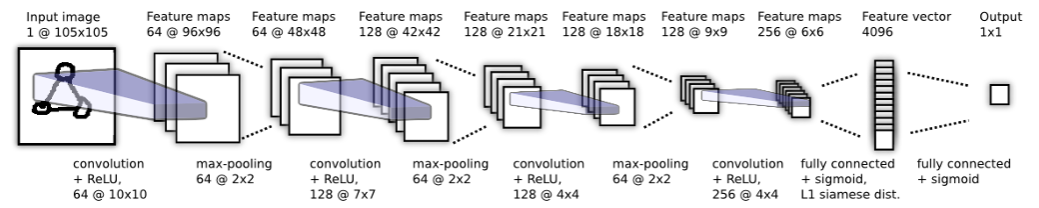

In [ ]:
def make_embedding():

  # First step:
  inp= Input(shape=(100,100,3))                      #3, 100x100
  c1 = Conv2D(64, (10,10), activation='relu')(inp)   #64, 91x91 , 91 = ((dim input - filter_size + 2* padding)/stride) +1
  m1 = MaxPooling2D(64,(2,2), padding='same')(c1)                            #64, 46x46

  # Second step:
  c2 = Conv2D(128, (7,7), activation='relu')(m1)     #128, 39x39
  m2 = MaxPooling2D(64,(2,2), padding='same')(c2)     #128, 20x20

  # third step:
  c3 = Conv2D(128, (4,4), activation='relu')(m2)     #128, 16x16
  m3 = MaxPooling2D(64,(2,2), padding='same')(c3)     #128, 8x8

  # fourth step:
  c4= Conv2D(256, (4,4), activation='relu')(m3)     #256, 5x5
  f1 = Flatten()(c4)   # Put to a single dimension.... 5 x 5 x 256
  d1= Dense(4096, activation='sigmoid')(f1)  # 5 x5 x 256 => 4096
  return( Model(inputs = [inp], outputs = [d1], name= "embedding"))

In [ ]:
embedding = make_embedding()
embedding.summary()

Build Distance Layer:

In [ ]:
class L1Dist(Layer):
  def __init__(self, **kwargs):
    super().__init__()

  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

Make Siamese Model

In [ ]:
def make_siamese_model():
  # Anchor image in the network:
  input_image = Input(name='input_img', shape=(100,100,3))

  # Validation image in the network:
  validation_image = Input(name='validation_img', shape=(100,100,3))

  siamise_layer = L1Dist()
  siamise_layer._name = 'distance'
  distances = siamise_layer(embedding(input_image), embedding(validation_image))

  classifier = Dense(1, activation='sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs = classifier, name='SiameseNetwork')


In [ ]:
siamese_model = make_siamese_model()
siamese_model.summary()

Training the model:

1) Setup Loss and optimizer:

* loss function = binary cross loss, the loss function is the function we want to minimize. Here the binary cross function calculates the distance between the probability predicted and the real value.

* Optimizer: algortihm used to change the values of the weights, learning rate = how much we can change the values of the weight.

In [12]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4)  # Learning rate = 1e-4

2) Establish Checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

3) Build Train Step Function

The basic flow for a training on one batch is:
* Make a prediction
* Calculate Loss
* Derive gradients
* Calculate new weights and apply

@: decorator: it s a way to change or to do some modification of a function or a method.

In [13]:
@tf.function
# We will modify a function from tf (tensorflow)
def train_step(batch):

  with tf.GradientTape() as tape:
    # Get anchor:
    X = batch[:2]

    # Get a label:
    Y = batch[2]

    Yhat = siamese_model(X, training=True) # if dropout is use, training = true
    # Will activate those layer. if the training is False, those layer are not activated!
    loss = binary_cross_loss(Y, Yhat)

  # Calculate gradient:
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  # Calculate updated weights and apply:
  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

  return loss

*opt.apply_gradient*: our optimizer is calculating the new weight to use, according to the learning rate!

**Tips** : To have help on afunction, add ?? at the end of a function:

In [14]:
binary_cross_loss??

4) Build Training Loop

In [ ]:
def train(data, EPOCHS):
  # Loop through epochs:
  for epoch in range(1, EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))

    for idx, batch in enumerate(data):
      train_step(batch)
      progbar.update(idx+1)

    # Checkpoint every 10 epochs:
    if epoch % 10 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

5) Train the model

In [ ]:
EPOCHS = 50

train(train_data, EPOCHS)

6) Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next

In [ ]:
y_hat = siamese_model.predict([test_input, test_val])
result = [1 if prediction > 0.5 else 0 for prediction in y_hat]

print(result)

Show the results:

Calculate metrics:


# **Precision**:
Proportion des prédictions positives qui sont correctes

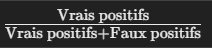


vs





# **Recall (Rappel):**
 Proportion des vrais positifs qui ont été détectés:

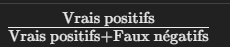

In [ ]:
# Recall is used for the classification.
# The recall mesurate the proportion of the case when the model predict the right value)
# Recall is used to evaluate the model

m = Recall()

# Update the state of the Recall oject :
m.update_state(y_true, result)

# return the value of the recall.
m.result().numpy()

In [ ]:
# Precision = real_pos/(real_pos + false_pos)
#Precision mesure the proportion of the positive prediction which are correct


m = Precision()
m.update_state(y_true, result)
m.result().numpy()

# **Visualisation of the results:**

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(test_input[0])

plt.subplot(1,2,2)
plt.imshow(test_val[0])

plt.show()
print(f"The result is {result[0]}")



# Save the model:

In [ ]:
siamese_model.save('siamese_model.h5')